# EXPLORATORY DATA ANALYSIS (EDA)

## PROCESS:
We will carry out various data analysis tasks on our dataset to understand the relations with data better. 
We will look at the sample count, class labels, skewedness, distribution and the co-linearity in our dataset to determine the best approach for further data processing.

## Import Modules

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

## Load dataset

In [45]:
train_df = pd.read_csv("Data/KDDTrain+.txt")
test_df = pd.read_csv("Data/KDDTest+.txt")

In [47]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

train_df.columns = columns
test_df.columns = columns

In [48]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [49]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


## Dimension of Data

In [50]:
print("Train subset dimensions:")
print("Number of Samples: %d" % train_df.shape[0])
print("Number of Features: %d" % train_df.shape[1])

Train subset dimensions:
Number of Samples: 125972
Number of Features: 43


In [51]:
print("Test subset dimensions:")
print("Number of Samples: %d" % test_df.shape[0])
print("Number of Features: %d" % test_df.shape[1])

Test subset dimensions:
Number of Samples: 22543
Number of Features: 43


## View Summary

In [52]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,115.653725,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,110.702886,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [53]:
test_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,22543.000000,2.254300e+04,2.254300e+04,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,...,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000,22543.000000
mean,218.868784,1.039591e+04,2.056110e+03,0.000311,0.008428,0.000710,0.105399,0.021648,0.442222,0.119904,...,140.756332,0.608747,0.090541,0.132267,0.019639,0.097818,0.099430,0.233351,0.226649,18.017833
std,1407.207069,4.727969e+05,2.121976e+04,0.017619,0.142602,0.036474,0.928448,0.150331,0.496661,7.269758,...,111.783059,0.435681,0.220722,0.306274,0.085396,0.273144,0.281872,0.387204,0.400851,4.270409
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000,21.000000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


## Data Cleaning

In [54]:
if train_df.isnull().any().any():
    print("NULL values present in Train set")
else:
    print("No NULL values in Train set")

No NULL values in Train set


In [55]:
if test_df.isnull().any().any():
    print("NULL values present in Test set")
else:
    print("No NULL values in Test set")

No NULL values in Test set


In [57]:
def zeroCount(dataFrame, columnName):
    noOfZeros = 0
    for i in range(dataFrame.shape[0]):
        if dataFrame[columnName][i] == 0:
            noOfZeros = noOfZeros + 1
    return noOfZeros

print("Number of 0s in the Target Column in Train set: %d" % zeroCount(train_df, 'attack'))
print("Number of 0s in the Target Column in Test set: %d" % zeroCount(test_df, 'attack'))

Number of 0s in the Target Column in Train set: 0
Number of 0s in the Target Column in Test set: 0


## View Target Distribubtion

In [61]:
train_df['attack'].value_counts()

normal             67342
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: attack, dtype: int64

In [63]:
test_df['attack'].value_counts()

normal             9711
neptune            4656
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
portsweep           157
ipsweep             141
httptunnel          133
nmap                 73
pod                  41
buffer_overflow      20
multihop             18
named                17
ps                   15
sendmail             14
rootkit              13
xterm                13
teardrop             12
xlock                 9
land                  7
xsnoop                4
ftp_write             3
perl                  2
phf                   2
loadmodule            2
sqlattack             2
udpstorm              2
worm                  2
imap                  1
Name: attack, dtype: int64

## Data Transformation (Binary Classification)

In [64]:
# Encode normal to 0, all attacks to 1
train_attack = train_df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

train_df['is_intrusion'] = train_attack
test_df['is_intrusion'] = test_attack

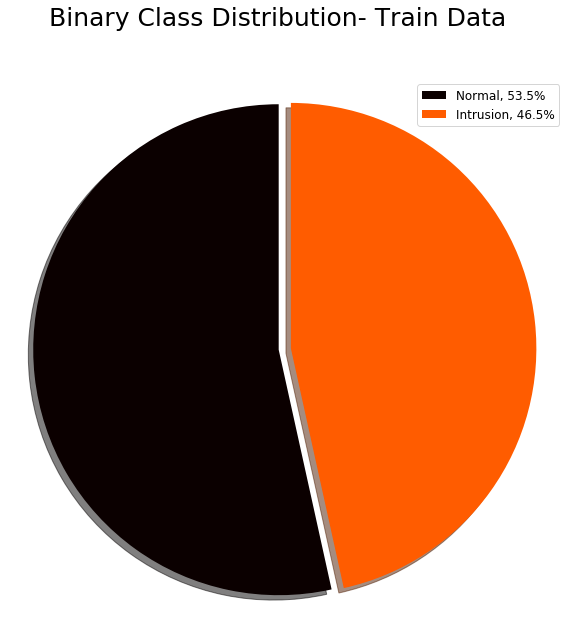

In [244]:
# %matplotlib inline

labels = ['Normal', 'Intrusion', ]
sizes = train_df['is_intrusion'].value_counts()
total = sum(sizes)

explode = [ 0.05, 0] # Only explode the intrusions ie first value

fig1, ax1 = plt.subplots(figsize=(10, 10))

theme = plt.get_cmap('hot')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])
ax1.axis('equal') # Ensures that pie is a circle

plt.pie(sizes, shadow= True, startangle = 90, explode=explode)

fig1.suptitle("Binary Class Distribution- Train Data", fontsize=25)
plt.legend(
    loc='upper right',
    fontsize = 'large',
    labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
)

plt.show()

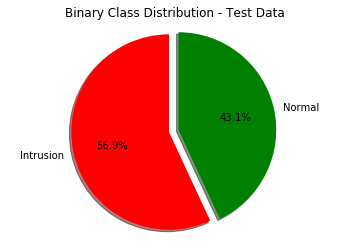

In [155]:
labels = 'Intrusion', 'Normal'
explode = [ 0.1, 0] # Only explode the intrusions ie first value

plt.pie(test_df['is_intrusion'].value_counts(), labels=labels, explode=explode, autopct='%1.1f%%', 
        colors =['red', 'green'], shadow= True, startangle = 90)

plt.axis('equal') # Ensures that pie is a circle
plt.title('Binary Class Distribution - Test Data')
plt.show()

## Data Transformation (Multiclass Classification)

In [77]:
dos = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

labels = ['Normal','DoS','Probe','Privilege','Access']

In [78]:
def classifyIntrusion(attack):
    if attack in dos:
        # dos_attacks map to 1
        value = 1
    elif attack in probe:
        # probe_attacks mapt to 2
        value = 2
    elif attack in privilege:
        # privilege escalation attacks map to 3
        value = 3
    elif attack in access:
        # remote access attacks map to 4
        value = 4
    else:
        # normal maps to 0
        value = 0
    return value

train_encoding = train_df.attack.apply(classifyIntrusion)
train_df['intrusion'] = train_encoding

test_encoding = test_df.attack.apply(classifyIntrusion)
test_df['intrusion'] = test_encoding

In [79]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,is_intrusion,intrusion
0,0,udp,other,SF,146,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.0,0.00,normal,15,0,0
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.03,0.04,0.03,0.01,0.0,0.01,normal,21,0,0
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.00,0.0,0.00,normal,21,0,0
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1


In [80]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,is_intrusion,intrusion
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21,1,1
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.02,0.00,0.0,0.00,0.00,normal,21,0,0
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.28,0.00,0.0,0.00,0.00,saint,15,1,2
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11,1,2
4,0,tcp,http,SF,267,14515,0,0,0,0,...,0.01,0.03,0.01,0.0,0.00,0.00,normal,21,0,0


Binary Class distribution 0    67351
1    45927
2    11656
4      995
3       43
Name: intrusion, dtype: int64


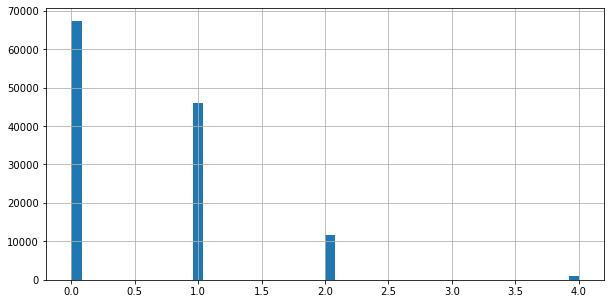

In [81]:
print("Binary Class distribution", train_df['intrusion'].value_counts())
train_df['intrusion'].hist(bins=50, figsize=(10,5))

In [219]:
# labels = ['Normal','DoS','Probe','Privilege','Access']
# colors = ['Green', '#FF3333', '#FB7575', '#BD3434','Yellow']
# sizes = train_df['intrusion'].value_counts()

# explode = [ 0, 0.1, 0.1, 0.1 , 0.1] # Only explode the intrusions ie first value

# fig1, ax1 = plt.subplots(figsize=(10, 10))

# theme = plt.get_cmap('hot')
# ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

# plt.pie(sizes,shadow= True, startangle = 90, explode=explode)


# ax1.axis('equal') # Ensures that pie is a circle
# total = sum(sizes)
# plt.legend(
#     loc='upper left',
#     labels=['%s, %1.1f%%' % (
#         l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
#     prop={'size': 11},
#     bbox_to_anchor=(0.0, 1),
#     bbox_transform=fig1.transFigure
# )
# plt.title("Hi")
# plt.show()

Binary Class distribution 0    9855
1    7459
4    2743
2    2421
3      65
Name: intrusion, dtype: int64


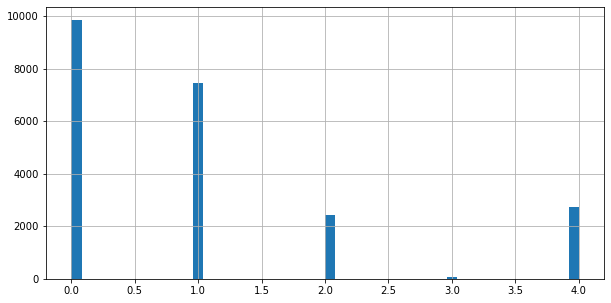

In [82]:
print("Binary Class distribution", test_df['intrusion'].value_counts())
test_df['intrusion'].hist(bins=50, figsize=(10,5))